In [11]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter 
from model import model_trainer

In [12]:
print(f'Torch version: {torch.__version__}, Torchvision Version: {torchvision.__version__}')


Torch version: 1.12.1, Torchvision Version: 0.13.1


In [13]:
image_size = 64
batch_size = 128

In [14]:
### Dataset Downloader - CelebA Dataset
img_transform = transforms.Compose(
    [   transforms.Resize(image_size),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


In [15]:

dataset = torchvision.datasets .ImageFolder(root='../../_DATA_/CelebA/imgs/',transform=img_transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

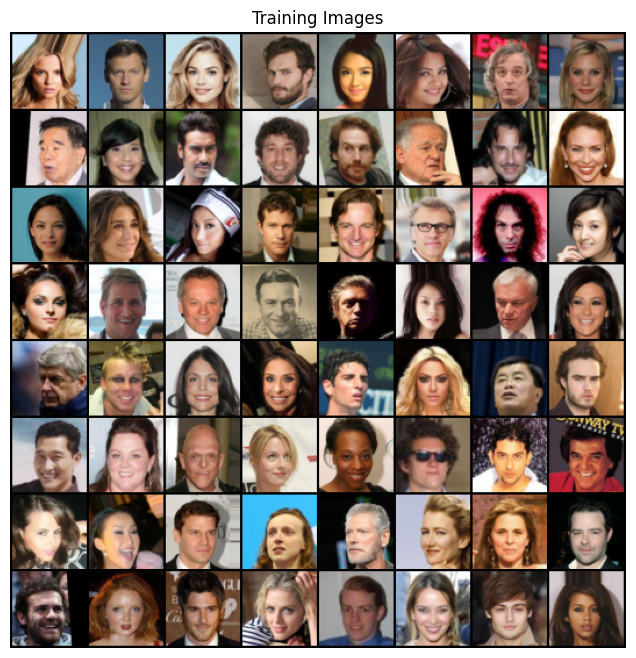

In [17]:
# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [18]:
np.shape(next(iter(dataloader))[0][1]) # first dim is class, second is the number of image in batch_size, the net dims: nc,H,W

torch.Size([3, 64, 64])

In [19]:

# Batch size during training
batch_size = 128

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 5

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5


In [ ]:
g,d,img_list = model_trainer(dataloader, ndf,ngf, nc,nz,num_epochs, lr,beta1)

In [ ]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()